# Hydrogen atom

Let us consider a toy model of a hydrogen atom, where the electron is treated as a quantum particle, while the proton is treated as a central massive classical particle. The electron is thus subject to the Coulomb potential of the proton, but the proton does not feel the Coulomb potential of the electron. The Hamiltonian of the system is given by:

$$H = \frac{p^2}{2m_e} + \frac{p^2}{2m_p} - \frac{e^2}{4\pi\epsilon_0 r}$$

where $m_e$ and $m_p$ are the masses of the electron and proton, respectively, $e$ is the elementary charge, $\epsilon_0$ is the vacuum permittivity, and $r$ is the distance between the electron and proton. The Hamiltonian is separable in the center-of-mass and relative coordinates:

$$H = H_{\text{cm}} + H_{\text{rel}}$$

Therefore, we will introduce a new set of coordinates:

$$R = \frac{m_e r_e + m_p r_p}{m_e + m_p}\quad (\text{Center of mass})$$
$$P = p_e + p_p\quad (\text{Total momentum})$$

$$r = r_e - r_p\quad (\text{Relative coordinate})$$
$$p = \frac{m_p p_e - m_e p_p}{m_e + m_p}\quad (\text{Relative momentum})$$

where $r_e$ and $r_p$ are the positions of the electron and proton, respectively, and $p_e$ and $p_p$ are the momenta of the electron and proton, respectively. Also remember that the reduced mass of the system is given by:

$$\mu = \frac{m_e m_p}{m_e + m_p}$$

The Hamiltonian in the center-of-mass coordinates is given by:

$$H_{\text{cm}} = \underbrace{\frac{P^2}{2M}}_{\text{Free Particle}} + \underbrace{\frac{p^2}{2\mu} - \frac{e^2}{4\pi\epsilon_0 r}}_{\text{New Hydrogen hamiltonian}}$$

where $M = m_e + m_p$ is the total mass of the system. Therefore, we will keep:

$$H = \frac{-\hbar^2}{2\mu}\nabla^2 - \frac{e^2}{4\pi\epsilon_0 r}$$
$$ = \frac{-\hbar^2}{2\mu}\left(\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right) + \frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial\phi^2}\right) - \frac{e^2}{4\pi\epsilon_0 r}$$

We know from now that the solution is separable in spherical coordinates:

$$\psi(r, \theta, \phi) = R(r)Y(\theta, \phi)$$

where $R(r)$ is the radial part and $Y(\theta, \phi)$ is the angular part (spherical harmonics). The radial part is solvable via:

$$\left(-\frac{\hbar^2}{2\mu}\frac{\partial^2}{\partial r^2} - \frac{\hbar^2}{2\mu}\frac{2}{r}\frac{\partial}{\partial r} + \frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2} - \frac{e^2}{4\pi\epsilon_0 r}\right)R(r) = ER(r)$$

where $l$ is the orbital angular momentum quantum number. To tackle this equation, we will use the substitution:

$$R(r) = \frac{u(r)}{r}$$

which leads to:

$$\left(-\frac{\hbar^2}{2\mu}\frac{\partial^2}{\partial r^2} + \frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2} - \frac{e^2}{4\pi\epsilon_0 r}\right)u(r) = Eu(r)$$

With the boundary condition $u(0) = 0$ and $u(\infty) = 0$. 
The energy eigenvalues are given by:

$$E_n = -\frac{me^4}{32\pi^2\epsilon_0^2\hbar^2}\frac{1}{n^2}\approx \frac{-13.6\text{ eV}}{n^2}$$

where $n = l + 1$ is the principal quantum number. The state with $n=1$ is the ground state with a binding energy of $13.6$ eV. 

The full solution is a function of the spherical harmonics and the radial part:

$$\psi = \sqrt{\frac{2}{n a_0^3} \frac{(n-l-1)}{2n(n+l)!}e^{-\frac{r}{na_0}}\left(\frac{2r}{na_0}\right)^l}L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)Y_l^m(\theta, \phi)$$

where $a_0 = \frac{4\pi\epsilon_0\hbar^2}{me^2}$ is the Bohr radius, $L_{n-l-1}^{2l+1}$ is the associated Laguerre polynomial, and $Y_l^m$ is the spherical harmonic. The radial part is plotted below for the first three states:

┌ Info: Saved animation to /tmp/jl_ZaroVIbgVk.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_ZaroVIbgVk.gif")
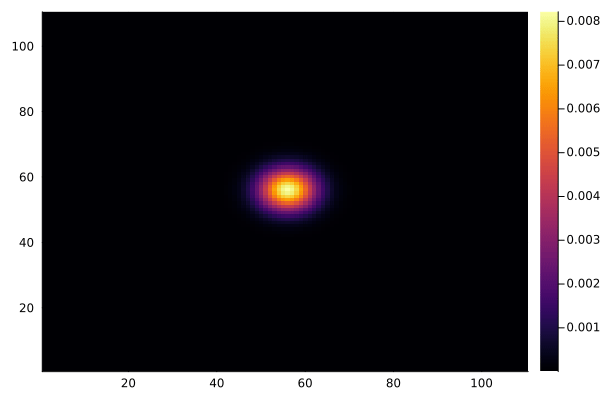

In [12]:

using LinearAlgebra, Plots,Interpolations, Random
using Distributions
import PlotlyJS
using SparseArrays
using Kronecker
using Arpack

# Mesh size
Nx =  110
Ny = Nx
# Range information
ax,bx = -1,1
ay,by = -1,1
# Space grids
Rx = ax:(bx-ax)/(Nx):bx
Ry = ay:(by-ay)/(Nx):by

########################################################################
#                   POTENTIAL
########################################################################
# Define the potential function
V(x,y) =  (x^2+y^2)

"""
Map the potential to each point in space
"""
function make_vs()
   z = zeros(Nx,Ny)
   for px in 1:Nx
      for py in 1:Ny
         z[px,py]=V(Rx[px],Ry[py])
   end end
   z
end

𝓥 = make_vs()
# Plot the potential
PlotlyJS.plot(PlotlyJS.contour(x=Rx, y=Ry,z=𝓥, contours_coloring="heatmap" ))


########################################################################
#              Construct the strange matrices
########################################################################

#Create the diagonal sparse matrix to use
D = spdiagm(-1 => ones(Nx-1), 0 => ones(Nx)*(-2) ,1 => ones(Nx-1) )

# Define the kinetic energy as the Kronecker sum
𝕋 = sparse((D ⊕ D)).*(-0.5)
# Define the potential function
𝕌 = spdiagm(0 => reshape((𝓥),Nx^2))
# Create the Hamiltonian
ℍ = 𝕋 + 𝕌
########################################################################
#              Get the eigensystem
########################################################################
# Use an approximation for the 20 first eigensystems of the problem
λ, ϕ = eigs(ℍ, nev = 20, which=:SM)
# Mat the resulting function to the initial space
Φ(n) =  reshape((ϕ)[:,n],Nx,Nx)

########################################################################
#              See the ψ
########################################################################
#PlotlyJS.plot(PlotlyJS.heatmap(x=Rx, y=Ry,z=Φ(1), showscale=false, connectgaps=true, zsmooth="best" ))

########################################################################
#              See the ψ²
########################################################################
#PlotlyJS.plot(PlotlyJS.heatmap(x=Rx, y=Ry,z=Φ(4).^2, showscale=false, connectgaps=true, zsmooth="best" ))

########################################################################
#              Study the linear relation
########################################################################
# Evaluate the energy levels by normalization
ϐ = λ[1]/2
ε = λ/ϐ
# Plot the energy levels
Plots.scatter(ε)

########################################################################
#             Some Flexing
########################################################################
# Create the old fasion animation
gr()
using Plots
anim = @animate for n = 1:15
    heatmap(Φ(n).^2)
end
gif(anim, fps = 3)